In [9]:
import os
import pandas as pd
import json
import folium
import numpy as np
import seaborn as sns
from scipy import stats
sns.set_context('notebook')
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
pd.options.mode.chained_assignment = None

## `Question 1`

In [10]:
europe_geo_path = r'topojson/europe.topojson.json'
geo_json_data = json.load(open(europe_geo_path))

Let us first draw the map of Europe

In [11]:
map_europe = folium.Map([56,15], tiles='Mapbox Bright', zoom_start=3)
map_europe

europe.csv contains the unemployment rates of european countries

In [14]:
rates = pd.read_csv('data/europe.csv')

We now do some data cleaning on our Dataframe, by extracting only the needed rows and columns, namely corresponding to the countries and their respective national unemployment rates. We also rename these two columns accordingly.

In [15]:
rates = rates[['Unemployment rate by age', 'Unnamed: 23']][7:44]
rates.rename(columns={'Unemployment rate by age': 'Country', 'Unnamed: 23': 'Unemployment rate'}, inplace=True)
rates.index = np.arange(1, len(rates) + 1)
rates.head(8)

,Country,Unemployment rate
1,Belgium,20.1
2,Bulgaria,17.2
3,Czech Republic,10.5
4,Denmark,12
5,Germany,7.1
6,Estonia,13.4
7,Ireland,17.2
8,Greece,47.3


We fill see that there is some 'Non provided' values for **Liechtenstein, Montenegro, Albania and Serbia**. We decided to fill them up using data from Google Analytics. Also, to have matching names between the provided JSON file & our dataset, we had to rename **Macedonia** to **The former Yugoslav Republic of Macedonia**

In [16]:
rates['Unemployment rate'][30] = 2.3 #Liechtenstein
rates['Unemployment rate'][33] = 20.58 #Montenegro
rates['Unemployment rate'][35] = 16.1 #Albania
rates['Unemployment rate'][36] = 15.91 #Serbia
#Match name
rates['Country'][34] = 'The former Yugoslav Republic of Macedonia'


**We see that there is some missing countries, and in order for us to retrieve them, we load another csv file containing the unemployment rate of the missing countries, put the data into a DataFrame and concatenate the 2 DataFrames**

In [19]:
missing_rates = pd.read_csv('data/missing_rates.csv')
missing_rates

,Country,Unemployment rate
0,Ukraine,9.35
1,Belarus,1.10
2,Republic of Moldova,12.60
3,Andorra,3.70
4,San Marino,8.60
5,Russia,5.51
6,Israel,4.30
7,Kosovo,27.50
8,Monaco,2.00
9,Bosnia and Herzegovina,39.40


In [20]:
rates = pd.concat([rates, missing_rates])

We finally end up having a clean DataFrame containing the unemployment rate of all the 51 European countries

In [21]:
rates['Unemployment rate'] = list(map(lambda x: float(x), rates['Unemployment rate']))

In [34]:
map_europe = folium.Map([52,15], tiles='Mapbox Bright', zoom_start=3)
un_rate = rates['Unemployment rate']
scale = np.linspace(un_rate.min(), un_rate.max()+1, 6, dtype=int).tolist()

map_europe.choropleth(geo_data=geo_json_data, data=rates,
             columns=['Country', 'Unemployment rate'],
             key_on='properties.NAME',
             topojson= 'objects.europe',
             fill_color='OrRd', fill_opacity=.65, line_opacity=0.9,
             threshold_scale = [1.1, 11.2, 14.5, 17.8, 27.5, 48.2], #
             legend_name='Percentage of unemployment (%)')

In [35]:
map_europe

__We can see from the map that Switzerland has a small unemployment rate. Indeed, it is the 11st smallest in Europe as displayed in the following sorted DataFrame.__

In [36]:
rates.sort_values('Unemployment rate').head(15)

,Country,Unemployment rate
1,Belarus,1.10
8,Monaco,2.00
30,Liechtenstein,2.30
3,Andorra,3.70
6,Israel,4.30
12,Azerbaijan,5.10
13,Faroe Island,5.50
5,Russia,5.51
29,Iceland,6.50
5,Germany,7.10


In [37]:
map_europe.save('saved_maps/01_europe_unemployement.HTML')

## `Question 2`

In this exercice, the unemployment rate in switzerland will be displayed in the map. The unemployment rate in the dataset corresponds to every citizen looking for a job (they can be employed temporary by the unemployment placement) divided py the population number. The unemployment rate corresponds to the September 2017 statistics.
The following strategy was applied in order to plot the map:
- First, the dataset is imported into a dataframe to obtain the cantons,the unemployment rate, the registered unemployed, and the population asking for job as columns
- A common language needs to be found in order to match the cantons data obtain in the unemployment website and the topojson file that contains the description of the cantons in the map. It was noted that the cantons are written in German in the topojson file but the acronyms are also available. Since the dataframe is in french a new Excel file containing the cantons with their acronyms (VS, ZH, GE,...) is imported in a second dataframe. The 2 dataframes are merged which means a new columns with the cantons acronyms is added
- The next step consist of reading the topojson file and display the cantons border
- Finally, the choroplets map is created with the dataframe (columns cantons acronyms and Taux de chomage) and the topojson file

In [38]:
#Data cleaning
dfTauxChomage=pd.read_excel("data/unemployement_rate.xlsx")
dfTauxChomage=dfTauxChomage[["2.1 Taux de chômage",'Unnamed: 2','Unnamed: 3','Unnamed: 4']]
dfTauxChomage=dfTauxChomage.rename(columns={"2.1 Taux de chômage":"Canton",
    'Unnamed: 2':"Taux de chomage",'Unnamed: 3':'Chômeurs inscrits',
    'Unnamed: 4':'Demandeurs d\'emplois'}) #Take the right columns
dfTauxChomage=dfTauxChomage.loc[3:29] #Remuve useless rows
dfTauxChomage['Taux de chomage']=list(map(lambda x: float(x),dfTauxChomage['Taux de chomage']))
dfAcronym=pd.read_excel("data/cantons_acronyms.xlsx")
dfTauxChomage=pd.merge(dfTauxChomage,dfAcronym,on='Canton',how='inner')
dfTauxChomage.head(5)

,Canton,Taux de chomage,Chômeurs inscrits,Demandeurs d'emplois,Cantons Acronyms
0,Zurich,3.3,27225,6931,ZH
1,Berne,2.4,13658,4727,BE
2,Lucerne,1.7,3885,2871,LU
3,Uri,0.6,112,145,UR
4,Schwyz,1.7,1455,774,SZ


In [39]:
map_canton = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=7)  

topo_path = r"topojson/ch-cantons.topojson.json"
topo_json_data = open(topo_path)

folium.TopoJson(open(r"topojson/ch-cantons.topojson.json"),
                'objects.cantons',
                name='topojson',
               ).add_to(map_canton)

file=json.load(topo_json_data)

map_canton.choropleth(geo_data=file, data=dfTauxChomage,
             columns=['Cantons Acronyms', 'Taux de chomage'],
             key_on='id',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployment rate (%)',
             topojson='objects.cantons')
map_canton

In [40]:
map_canton.save('saved_maps/02_01_switzerland_unemployment.HTML')

The swiss unemployment rate include every citizen looking for a job. We can adapt this rate to find the rate of the population who are registered as unemployed and do not have a job.
In order to adapt our unemployment rate, we need need the number of registerd unemployed people and the number of people asking for a job.

To compute our adapted rate, we first need the active population in each canton : 

\begin{equation}
  Active\ population\ in\ canton\ =\ \frac{Unemployment\ rate}{People\ looking\ for\ a\ job\ unregistered\ +\ Registered\ people\ (unemployed)}\
\end{equation}

Then the adapted unemployed rate which corresponds to the registered unemployed people rate is derieved :

\begin{equation}
   Registered\ unemployed\ people\ rate =\ \frac{Registered\ people\ (unemployed)}{Active\ population\ in\ canton}\
\end{equation}

Finally the map is displayed using the same method as the first part of the exercice.

In [41]:
#Computation of the adapted rate
listTauxChomage=list(dfTauxChomage['Taux de chomage'])
listChômeursInscrit=list(dfTauxChomage['Chômeurs inscrits'])
listDemandeurEmploi=list(dfTauxChomage['Demandeurs d\'emplois'])

listAdaptedEmploymentRate=[x*y/(y+z) for x,y,z in zip(listTauxChomage,
                                                    listChômeursInscrit,listDemandeurEmploi)]
dfTauxChomage['Adapted unemployment rate']=pd.Series(listAdaptedEmploymentRate)

__Display the map__

In [42]:
map_adapted = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=7)  

folium.TopoJson(open(r"topojson/ch-cantons.topojson.json"),
                'objects.cantons',
                name='topojson',
               ).add_to(map_adapted)

map_adapted.choropleth(geo_data=file, data=dfTauxChomage,
             columns=['Cantons Acronyms', 'Adapted unemployment rate'],
             key_on='id',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Adapted unemployment rate (%)',
             topojson='objects.cantons'
             )
map_adapted

In [43]:
map_adapted.save('saved_maps/02_02_adapted_switzerland_unemployment.HTML')

In order to study if there is a relation between the 2 different unemployment rate, a simple  regression operation is performed putting the Swiss unemployment rate in x-axis and the adapted unemployment rate in y-axis.

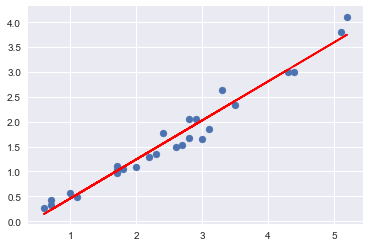

In [44]:
def draw_regress(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line1 = intercept + slope*x

    plt.scatter(x,y)
    plt.plot(x,line1,'r')
    plt.show()

draw_regress(dfTauxChomage['Taux de chomage'],pd.Series(listAdaptedEmploymentRate))

As we can see in the regression line, if a canton has a low unemployment rate, this canton has also few people looking for a job. It would be also possible to compare the unemployment rate by age range with the overall unemployment rate.

## `Question 3(1)`

In [45]:
ch_path = r'topojson/ch-cantons.topojson.json'
topo_json_data = json.load(open(ch_path))

In [46]:
map_ch = folium.Map([46.5,8.2], tiles='Mapbox Bright', zoom_start=7)
map_ch

In [47]:
folium.TopoJson(open(ch_path), 'objects.cantons', name='topojson').add_to(map_ch)
map_ch

In [48]:
rates_nationality = pd.read_csv('data/cantons_nationality.csv')
rates_nationality = rates_nationality[['Code', 'Nationality', 'Rate']]
rates_nationality.head()

,Code,Nationality,Rate
0,ZH,foreign,5.3
1,BE,foreign,5.5
2,LU,foreign,3.9
3,UR,foreign,2.1
4,SZ,foreign,3.4


## `Question 3(2)`

`In order to calculate the difference between foreign and Swiss unemployement rates,
multiply rates related to Swiss nationality then groupby() and sum() by cantons.`

In [49]:
rates_nationality["Rate"][rates_nationality["Nationality"] == "swiss"] *= -1
grouped = rates_nationality[['Code', 'Rate']].groupby('Code').sum()
grouped['Canton'] = grouped.index
grouped.index = np.linspace(1,26,26)
grouped.head()

,Rate,Canton
1.0,3.5,AG
2.0,1.5,AI
3.0,2.0,AR
4.0,3.7,BE
5.0,2.6,BL


In [50]:
map_difference = folium.Map([46.5,8.2], tiles='Mapbox Bright', zoom_start=7)
map_difference.choropleth(geo_data=topo_json_data, data=grouped,
             columns=['Canton', 'Rate'],
             key_on='id',
             topojson= 'objects.cantons',
             fill_color='BuPu', fill_opacity=0.8, line_opacity=0.9,
             legend_name='Difference in Unemployement Rate b/w Swiss and Foreign')
map_difference

In [51]:
map_difference.save('saved_maps/03_switzerland_unemployment_difference.HTML')

`As it is seen clearly that difference between foreign and Swiss unemployement rate in certain cantons are much higher than others. It can be explained by strict foreign workers policies within these cantons. Moreover, it is also obverved that the high difference between foreign and Swiss unemployement rates are corelated with overall unemployement rates.`

## `Question 3(3)`

`Load the data that contains number of unemployed people according to both nationality and age groups. Along with other dataframes, this information will be used to to calculate unemployement rate according to nationality and age groups.`

**`Age Groups`** `are as follows:` **`1`** `= 15-24,` **`2`** `= 25-49 and` **`3`** `= 50 and higher.` 

`A reference dictionary is created such that keys are (canton,nationality) and value is numbers of unemployed people.`

In [52]:
age_nationality = pd.read_csv('data/canton_age_nationality.csv')
age_nationality = age_nationality[['Canton', 'Nationalité','Classes d\'âge 15-24, 25-49, 50 ans et plus', 'Septembre 2017']]
age_nationality.columns = ['Canton', 'Nationality', "Group", "Number"]
age_nationality.Number = age_nationality.Number.str.replace(',','')
total_nationality = age_nationality[age_nationality.Group=="Total"][['Canton','Nationality','Number']]
total_nationality = total_nationality.set_index(["Canton","Nationality"])
total_nationality.head(10)

Number
Canton  Nationality       
Zurich  Etrangers    12111
        Suisses      15114
Berne   Etrangers     4900
        Suisses       8758
Lucerne Etrangers     1593
        Suisses       2292
Uri     Etrangers       53
        Suisses         59
Schwyz  Etrangers      617
        Suisses        838

In [53]:
ref_num = total_nationality.to_dict()['Number']

`Another reference dictionary is created such that keys are (canton,nationality) and value is rates of unemployed people.`

In [54]:
rates_nationality = pd.read_csv('data/cantons_nationality.csv')
rates_nationality = rates_nationality[['Code', 'Nationality', 'Rate']]
rates_nationality.Nationality = rates_nationality.Nationality.apply(lambda n: "Etrangers" if n=="foreign" else "Suisses")
rates_nationality = rates_nationality.set_index(["Code","Nationality"])
rates_nationality.head(10)

,,Rate
Code,Nationality,
ZH,Etrangers,5.3
BE,Etrangers,5.5
LU,Etrangers,3.9
UR,Etrangers,2.1
SZ,Etrangers,3.4
OW,Etrangers,2.2
NW,Etrangers,2.9
GL,Etrangers,3.4
ZG,Etrangers,3.9


In [55]:
ref_rate = rates_nationality.to_dict()['Rate']

In [56]:
tmp = age_nationality[age_nationality['Nationality']!="Total"]
tmp = tmp[tmp['Group']!="Total"]
age_nationality = tmp[tmp['Canton']!="Total"]
age_nationality.head(10)

,Canton,Nationality,Group,Number
0,Zurich,Etrangers,1,1015
1,Zurich,Etrangers,2,8846
2,Zurich,Etrangers,3,2250
4,Zurich,Suisses,1,2405
5,Zurich,Suisses,2,8207
6,Zurich,Suisses,3,4502
9,Berne,Etrangers,1,597
10,Berne,Etrangers,2,3316
11,Berne,Etrangers,3,987
13,Berne,Suisses,1,1406


`In order to convert canton names into corresponding codes, a reference dictionary is created.`

In [57]:
ref_canton = {'Zurich':'ZH', 'Berne':'BE', 'Lucerne':'LU', 'Uri':'UR', 'Schwyz':'SZ', 'Obwald':'OW', 
       'Nidwald':'NW','Glaris':'GL', 'Zoug':'ZG', 'Fribourg':'FR', 'Soleure':'SO', 
       'Bâle-Ville':'BS','Bâle-Campagne':'BL', 'Schaffhouse':'SH', 
       'Appenzell Rhodes-Extérieures':'AR','Appenzell Rhodes-Intérieures':'AI', 
       'St-Gall':'SG', 'Grisons':'GR', 'Argovie':'AG','Thurgovie':'TG', 'Tessin':'TI', 
       'Vaud':'VD', 'Valais':'VS', 'Neuchâtel':'NE', 'Genève':'GE','Jura':'JU', 'Total':'Total'}

In [58]:
age_nationality['Code'] = age_nationality.apply(lambda row: ref_canton[row['Canton']], axis=1)

`Calculate ratios according to Nationalities and Age Groups.`

`e.g. number of unemployed Swiss people in age group 1 / total number of unemployed Swiss poeple`

In [59]:
age_nationality.Number = age_nationality.apply(lambda row:int(row['Number'])/int(ref_num[row['Canton'],row['Nationality']]), axis=1)
age_nationality = age_nationality[['Code','Nationality','Group','Number']]
age_nationality.head(10)

,Code,Nationality,Group,Number
0,ZH,Etrangers,1,0.083808
1,ZH,Etrangers,2,0.730410
2,ZH,Etrangers,3,0.185782
4,ZH,Suisses,1,0.159124
5,ZH,Suisses,2,0.543006
6,ZH,Suisses,3,0.297870
9,BE,Etrangers,1,0.121837
10,BE,Etrangers,2,0.676735
11,BE,Etrangers,3,0.201429
13,BE,Suisses,1,0.160539


`Calculate rates according to Nationalities and Age Groups.`

`e.g. rate of unemployed Swiss people * ratio of unemployed Swiss poeple in age group 1`

In [60]:
age_nationality.Number = age_nationality.apply(lambda row:\
                        float(ref_rate[row['Code'],row['Nationality']])*float(row['Number']), axis=1)
age_nationality.columns = ["Code","Nationality","Group Code","Age Group"]
age_nationality.head(10)

,Code,Nationality,Group Code,Age Group
0,ZH,Etrangers,1,0.444183
1,ZH,Etrangers,2,3.871175
2,ZH,Etrangers,3,0.984642
4,ZH,Suisses,1,0.397810
5,ZH,Suisses,2,1.357516
6,ZH,Suisses,3,0.744674
9,BE,Etrangers,1,0.670102
10,BE,Etrangers,2,3.722041
11,BE,Etrangers,3,1.107857
13,BE,Suisses,1,0.288970


`It is required to reshape the dataframe to be able to draw stacked bar plot.`

In [61]:
reshaped = age_nationality.set_index(["Code","Nationality","Group Code"]).unstack()
reshaped.head()

Age Group                    
Group Code               1         2         3
Code Nationality                              
AG   Etrangers    0.672405  3.683025  1.244570
     Suisses      0.352206  1.026471  0.721324
AI   Etrangers    0.521739  0.869565  0.608696
     Suisses      0.128205  0.179487  0.192308
AR   Etrangers    0.398883  2.051397  0.949721

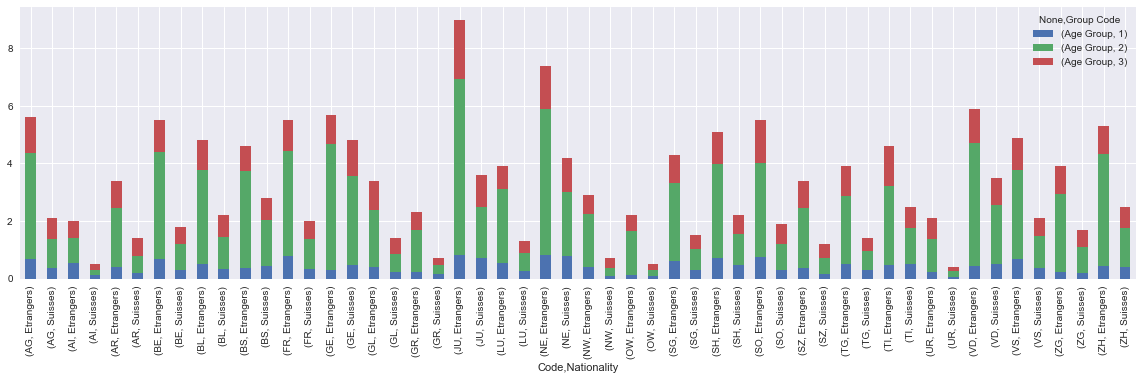

In [62]:
reshaped.plot(kind='bar', stacked=True, figsize=(20,5))

`From this figure it can easily be dervied that employement rates of certain age groups and nationalities.`

`e.g. Unemployement rate of Swiss people who are form 24 to 49 years old and live in Zurich Canton` 

## `Question 4 (Bonus)`

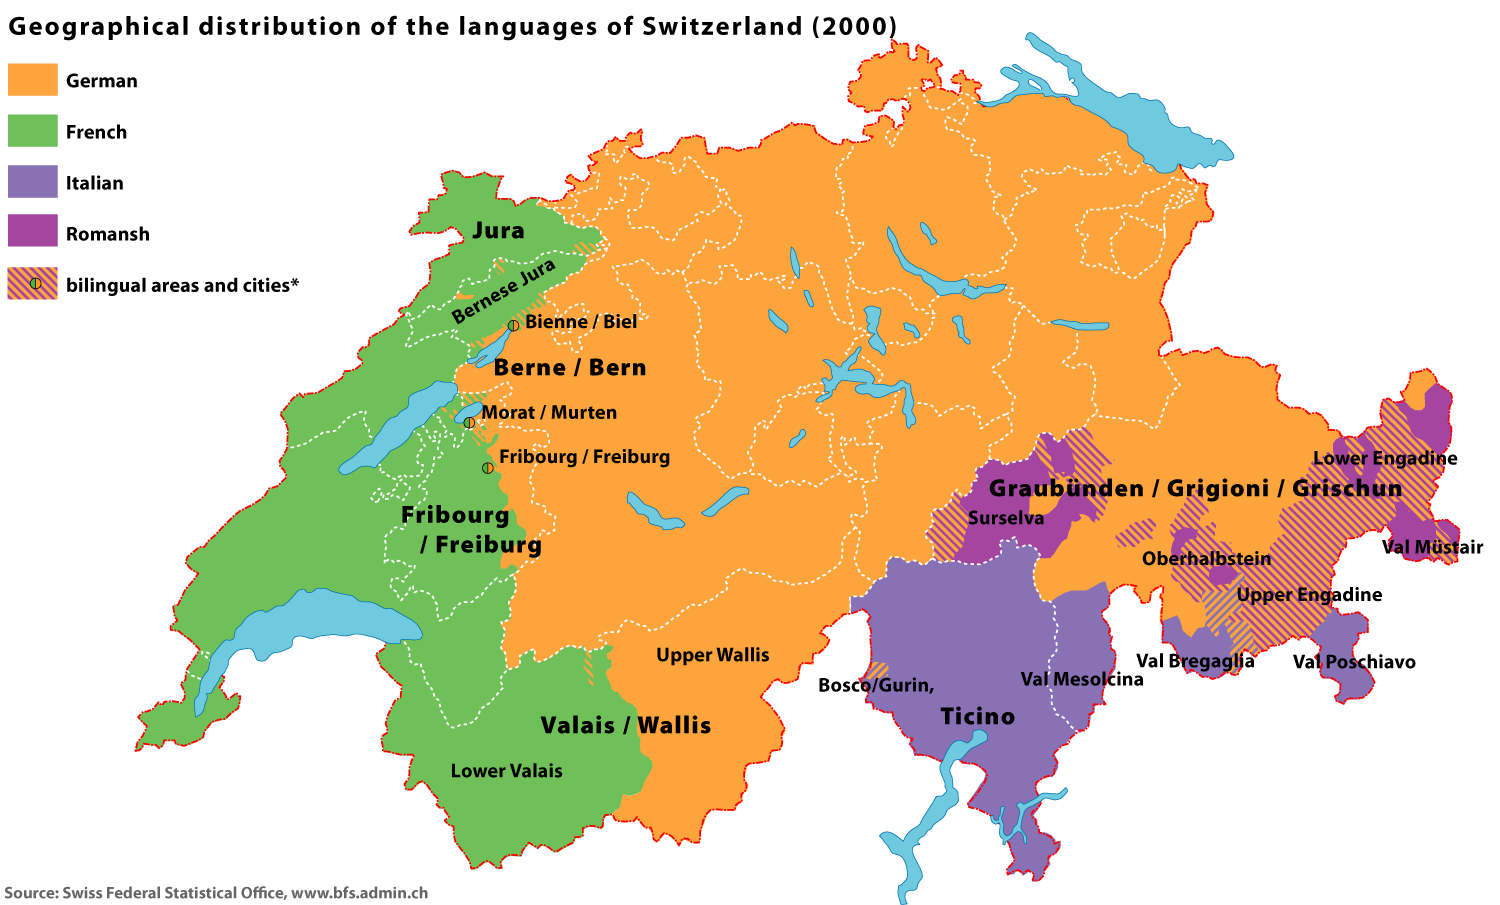

In [63]:
Image("img/rostigraben.png")

`To answer this question let's also draw unemployement rates of cantons, again.`

In [64]:
rate = pd.read_csv('data/cantons.csv')
rate = rate[['Code', 'Rate']]
rate.head()

,Code,Rate
0,ZH,3.3
1,BE,2.4
2,LU,1.7
3,UR,0.6
4,SZ,1.7


In [65]:
map_ch = folium.Map([46.5,8.2], tiles='Mapbox Bright', zoom_start=7)
map_ch.choropleth(geo_data=topo_json_data, data=rate,
             columns=['Code', 'Rate'],
             key_on='id',
             topojson= 'objects.cantons',
             fill_color='BuPu', fill_opacity=0.8, line_opacity=0.9,
             legend_name='Unemployement Rate by Cantons')
map_ch

`Using the map we have just built, and the geographical information contained in it, we can give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben.`

`Note that for the sake of simplicity, we consider regions as one of the foloowings: German, French or Italion speaking.`

`Since the question asks for rough estimation using the map and not the dataframe itself, following results are just that.`


| `Region` | `Unemployement Rate (Range)` |
|------|------|
| `German-speaking`  | `~2.1` |
| `Italian-speaking`  | `2.9 - 3.7` |
| `French-speaking`  | `3.7 - 4.5` |

`In order to make an estimation more algoritmically, we can roughly categorize cantons and then estimate unemployement rate as the avarage of them.`

In [66]:
italian_cantons = ['TI']
french_cantons = ['GE', 'VS', 'VD', 'FR', 'NE', 'JU']

In [67]:
french_rate = rate[rate.Code.isin(french_cantons)]
print("Unemployement in French-speaking regions is %.2f"%french_rate.mean())
italian_rate = rate[rate.Code.isin(italian_cantons)]
print("Unemployement in Italian-speaking regions is %.2f"%italian_rate.mean())
german_rate = rate[~rate.Code.isin(italian_cantons + french_cantons)]
print("Unemployement in German-speaking regions is %.2f"%german_rate.mean())

Unemployement in French-speaking regions is 4.08
Unemployement in Italian-speaking regions is 3.10
Unemployement in German-speaking regions is 2.00
